In [255]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sys import exit
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
import statsmodels.regression.linear_model as sm
from sklearn.ensemble import GradientBoostingRegressor

    
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",encoding = "ISO-8859-1")

filter=df["state"].isin(['Colorado','Idaho','Utah'])
#filter=df["state"].isin(['Utah'])
df=df[filter]
filter=df["date"]>='2020-04-01'
df=df[filter]
df=df.sort_values(['county'],ascending=True)
print("deaths by county " +str(df.groupby(["state","county",'date'])["cases","deaths"].agg([max])))



deaths by county                            cases deaths
                             max    max
state    county date                   
Colorado Adams  2020-04-01   214      6
                2020-04-02   260      7
                2020-04-03   294      9
                2020-04-04   320      9
                2020-04-05   354     10
...                          ...    ...
Utah     Weber  2020-04-18   105      1
                2020-04-19   110      1
                2020-04-20   119      1
                2020-04-21   119      1
                2020-04-22   125      1

[2433 rows x 2 columns]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Ada
Adams
Arapahoe
Boulder
Denver
Douglas
El Paso
Jefferson
Larimer
Nez Perce
Salt Lake
Twin Falls


No handles with labels found to put in legend.


Weld


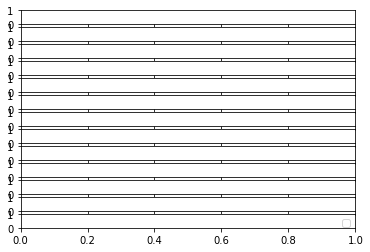

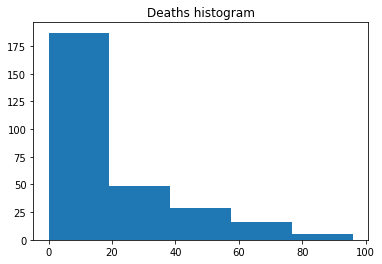

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


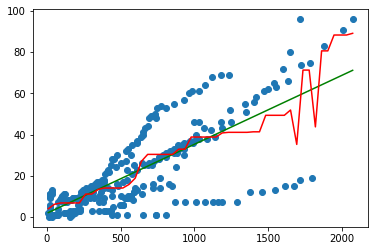

In [256]:
#results=df.pivot_table(index=["state","county"],columns='date', values=['deaths','cases'],fill_value=0)
#df_results=pd.DataFrame(results.to_records())
#plt.clf()
#results.plot(kind="scatter", 
#             x="cases",
#             y="deaths",
#             title="cases by deaths",rot=45)
#plt.xticks(rotation=45, ha='right')
#plt.show()


deaths=df['deaths'].tolist()
cases=df['cases'].tolist()
counties=df['county'].tolist()
counties_filter=df.groupby(['state','county'])['deaths'].max()>10
counties_filter=counties_filter.loc[counties_filter.values==True]
counties=pd.merge(df,counties_filter,how='inner',on=['state','county'])
counties_df=counties[counties['deaths_y']==True]
counties_unique=counties_df['county'].unique()

#grouped = counties_df.groupby('date')
#Figure out number of rows needed for 2 column grid plot
#Also accounts for odd number of plots
#nrows = int(math.ceil(len(grouped)/2.))

#Setup Subplots
#fig, axs = plt.subplots(nrows,2)
#for ax in axs.flatten():
#    for i,j in grouped:
#        j.plot(x='deaths_x',y='cases', ax=ax)
#plt.show()

rows=len(counties_unique)

fig,ax = plt.subplots(rows,1,sharex=True)
index=0

deaths=[]
cases=[]
index_date=[]

for item in counties_unique:
    print(item)
    subset_df=df[df['county']==item]
    dates=pd.to_datetime(subset_df['date']).dt.date
    dates=dates.unique()
    
    index=0
    for date in dates:
        subset_df=df[(df['county']==item) & (df['date']==str(date)) ]
        #print(subset_df.head(5))
        #deaths.append(subset_df.groupby('date')['deaths'].sum())
        result=subset_df.groupby('date')['deaths'].sum()
        deaths.append(result[0])
        index_date.append(date)
        subset_df=df[(df['county']==item)  & (df['date']==str(date))]
        result=subset_df.groupby('date')['cases'].sum()
        cases.append(result[0])
        
    
    #print(cases)

    dict={
        'deaths':deaths,
        'cases':cases,
        'date':index_date
    }
    #df_summary=pd.DataFrame(dict)
    #print(df_summary)
    #ax[index].bar(results['deaths'],results['cases'])
    #ax[index].set_title(item)
    deaths.clear()
    cases.clear()
    index+=1
    
plt.legend()  
plt.show()

deaths_unique=counties_df.groupby(['county','date'])['deaths_x'].max()
cases_unique =counties_df.groupby(['county','date'])['cases'].max()
counties_unique=counties_df['county'].unique()


plt.hist(deaths_unique,bins=5)
plt.title('Deaths histogram')
plt.xlabel='occurrences'
plt.ylabel='deaths'

plt.show()

X_cases=np.array(cases_unique).reshape(-1,1)
y_deaths=np.array(deaths_unique).reshape(-1,1)
prediction_space=np.linspace(min(X_cases),max(X_cases)).reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(X_cases, y_deaths)

SEED=1
gbt=GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
gbt.fit(X_cases, y_deaths)  

prediction_space=np.linspace(min(X_cases),max(X_cases)).reshape(-1,1)

plt.clf()
plt.scatter(cases_unique,deaths_unique)
plt.plot(prediction_space,model.predict(prediction_space),c="green")

plt.plot(prediction_space,gbt.predict(prediction_space),c="red")
plt.xlabel='deaths'
plt.ylabel='cases'
plt.show()




#rows=len(counties_unique)
#fig,ax = plt.subplots(rows,1)
#index=0

#index=0
#for item in counties_unique:
#        #print(item)
#        subset_df=counties_df[counties_df['county']==item]
#        #print(subset_df.head(5))
#        deaths=subset_df.groupby(['county'])['deaths_x'].max()
#        #print(deaths)
#        cases=subset_df.groupby(['county'])['cases'].max()
#        #print('deaths='+str(deaths)+':cases='+str(cases))
#        ax[index].bar(deaths,cases)
#        ax[index].set_title=str(item)
#        index+=1
#plt.xlabel('deaths')
#plt.ylabel('cases')